In [41]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris


iris = load_iris()

In [15]:
list (iris.target_names)

['setosa', 'versicolor', 'virginica']

In [13]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
Y = iris.target

In [17]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': -1
}
gbm = lgb.train(params,
                lgb_train,
                verbose_eval=False,
                valid_sets=lgb_eval)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy LightGBM: %.2f%%" % (accuracy * 100.0))


Accuracy LightGBM: 63.33%


([array([ 0.,  0.,  0.,  0.,  0., 10., 39., 38., 24.,  9.]),
  array([ 0.,  0.,  8., 77., 32.,  3.,  0.,  0.,  0.,  0.]),
  array([ 0., 37.,  6.,  1.,  8., 26., 22., 15.,  5.,  0.]),
  array([43., 40., 35.,  2.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.1 , 0.88, 1.66, 2.44, 3.22, 4.  , 4.78, 5.56, 6.34, 7.12, 7.9 ]),
 <a list of 4 Lists of Patches objects>)

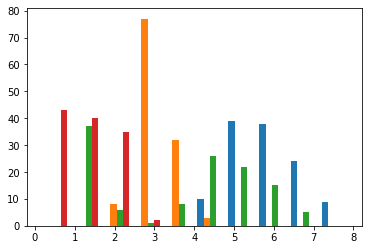

In [58]:
plt.hist(X_train)


(array([43.,  0.,  0.,  0.,  0., 38.,  0.,  0.,  0., 39.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

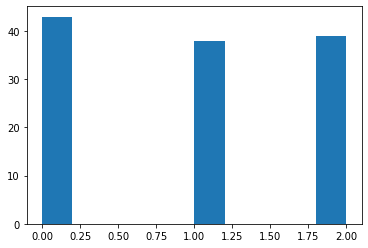

In [59]:
plt.hist(y_train)


(array([ 7.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0., 11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

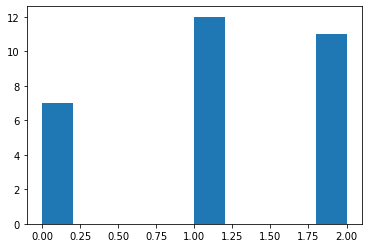

In [60]:
plt.hist(y_test)

([array([ 0.,  0.,  0.,  0.,  0.,  0.,  5.,  7., 11.,  7.]),
  array([ 0.,  0.,  1.,  9., 18.,  2.,  0.,  0.,  0.,  0.]),
  array([ 0.,  5.,  2.,  0.,  0.,  4., 11.,  5.,  3.,  0.]),
  array([ 7., 10., 10.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.1 , 0.81, 1.52, 2.23, 2.94, 3.65, 4.36, 5.07, 5.78, 6.49, 7.2 ]),
 <a list of 4 Lists of Patches objects>)

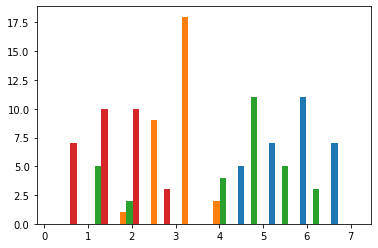

In [61]:
plt.hist(X_test)

In [ ]:
### Вместо XGB повторить с  LightGBM https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
### Построить гистограммы на matplotlib всех 4х параметров